In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [196]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv',encoding = 'latin1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [197]:
pd.crosstab(data['Late_delivery_risk'],data['Type'])

Type,CASH,DEBIT,PAYMENT,TRANSFER
Late_delivery_risk,,,,
0,8507,29646,17721,25668
1,11109,39649,24004,24215


In [198]:
pd.crosstab(data['Late_delivery_risk'],data['Days for shipping (real)'])

Days for shipping (real),0,1,2,3,4,5,6
Late_delivery_risk,,,,,,,
0,5080,203,30105,22006,21754,1160,1234
1,0,4454,26513,6759,6759,27003,27489


In [199]:
num_cols = data.select_dtypes(include = ['int64','float64']).columns
print(num_cols)

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')


In [200]:
for i in data.columns:
  print(i,data[i].nunique())

Type 4
Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Sales per customer 2927
Delivery Status 4
Late_delivery_risk 2
Category Id 51
Category Name 50
Customer City 563
Customer Country 2
Customer Email 1
Customer Fname 782
Customer Id 20652
Customer Lname 1109
Customer Password 1
Customer Segment 3
Customer State 46
Customer Street 7458
Customer Zipcode 995
Department Id 11
Department Name 11
Latitude 11250
Longitude 4487
Market 5
Order City 3597
Order Country 164
Order Customer Id 20652
order date (DateOrders) 65752
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Region 23
Order State 1089
Order Status 9
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0
Product Image 118
Product Name 118
Product Price 75
Prod

In [201]:
cat_low_cardinality = [i for i in data.select_dtypes(include = ["object"]).columns if data[i].nunique() < 50]

In [202]:
cat_low_cardinality

['Type',
 'Delivery Status',
 'Customer Country',
 'Customer Email',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Market',
 'Order Region',
 'Order Status',
 'Shipping Mode']

In [203]:
corr_mat = data[num_cols].corr()

In [204]:
corr_mat

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,0.000112,-0.001631,-0.004073,...,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,NaN,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.003019,-0.000262,-0.005300,...,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,NaN,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.002235,0.031442,0.000338,...,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,NaN,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,-0.001304,0.232367,-0.000223,...,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.003148,0.001077,0.000679,...,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,NaN,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.002898,0.888835,0.002195,...,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.002022,0.136897,0.002335,...,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,NaN,0.111118,NaN
Customer Zipcode,0.000112,-0.003019,0.002235,-0.001304,0.003148,0.002898,0.002022,1.000000,0.002878,0.584553,...,-0.006174,-0.001490,-0.001304,0.002235,0.011843,0.003173,0.002898,NaN,0.002191,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,0.002878,1.000000,0.002460,...,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,NaN,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.584553,0.002460,1.000000,...,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,NaN,0.000471,NaN


In [205]:
strong_corr = corr_mat[(corr_mat > 0.3) | (corr_mat < -0.3)]
strong_corr

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,NaN,NaN,0.401415,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipment (scheduled),0.515880,1.000000,NaN,NaN,-0.369352,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benefit per order,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Sales per customer,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.989744,1.000000,NaN,NaN,NaN,NaN,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category Id,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.888835,NaN,...,-0.302408,NaN,NaN,NaN,NaN,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.584553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department Id,NaN,NaN,NaN,NaN,NaN,0.888835,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.906117,0.888835,NaN,0.446743,NaN
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584553,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# Get correlation pairs > 0.3 or < -0.3
corr_pairs = (
    corr_mat.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)

# Filter strong positive or negative correlations
corr_pairs = corr_pairs[
    (corr_pairs['Correlation'] > 0.3) | (corr_pairs['Correlation'] < -0.3)
]

# Remove duplicates (A-B and B-A)
corr_pairs = corr_pairs[corr_pairs['Feature1'] < corr_pairs['Feature2']]

corr_pairs


,Feature1,Feature2,Correlation
4,Days for shipping (real),Late_delivery_risk,0.401415
27,Days for shipment (scheduled),Days for shipping (real),0.515880
31,Days for shipment (scheduled),Late_delivery_risk,-0.369352
72,Benefit per order,Order Item Profit Ratio,0.823689
76,Benefit per order,Order Profit Per Order,1.000000
143,Category Id,Department Id,0.888835
148,Category Id,Order Item Cardprod Id,0.991092
152,Category Id,Order Item Product Price,0.461059
154,Category Id,Order Item Quantity,-0.302408
159,Category Id,Product Card Id,0.991092


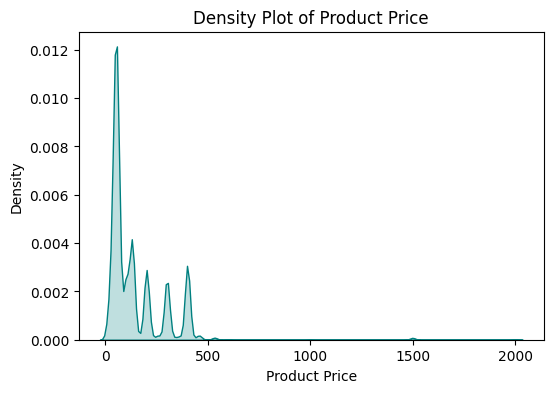

In [207]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data['Product Price'], fill=True, color='teal')  # use your numeric column here
plt.title('Density Plot of Product Price')
plt.xlabel('Product Price')
plt.ylabel('Density')
plt.show()

In [208]:
cols_to_keep = num_cols.tolist() + cat_low_cardinality
filtered_data = data[cols_to_keep]
filtered_data.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Customer Country,Customer Email,Customer Password,Customer Segment,Customer State,Department Name,Market,Order Region,Order Status,Shipping Mode
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fitness,Pacific Asia,Southeast Asia,COMPLETE,Standard Class
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fitness,Pacific Asia,South Asia,PENDING,Standard Class
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,EE. UU.,XXXXXXXXX,XXXXXXXXX,Consumer,CA,Fitness,Pacific Asia,South Asia,CLOSED,Standard Class
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,EE. UU.,XXXXXXXXX,XXXXXXXXX,Home Office,CA,Fitness,Pacific Asia,Oceania,COMPLETE,Standard Class
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Corporate,PR,Fitness,Pacific Asia,Oceania,PENDING_PAYMENT,Standard Class


In [209]:
dropped_cols = [col for col in data.columns if col not in cols_to_keep]
dropped_cols


['Category Name',
 'Customer City',
 'Customer Fname',
 'Customer Lname',
 'Customer Street',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order State',
 'Product Image',
 'Product Name',
 'shipping date (DateOrders)']

In [210]:
pd.crosstab(filtered_data['Late_delivery_risk'],filtered_data['Delivery Status'])

Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Late_delivery_risk,,,,
0,41592,0,7754,32196
1,0,98977,0,0


In [211]:
filtered_data.drop('Delivery Status', axis=1, inplace=True)

In [213]:
for i in filtered_data.columns:
  print(i,filtered_data[i].nunique())

Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Sales per customer 2927
Late_delivery_risk 2
Category Id 51
Customer Id 20652
Customer Zipcode 995
Department Id 11
Latitude 11250
Longitude 4487
Order Customer Id 20652
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0
Product Price 75
Product Status 1
Type 4
Customer Country 2
Customer Email 1
Customer Password 1
Customer Segment 3
Customer State 46
Department Name 11
Market 5
Order Region 23
Order Status 9
Shipping Mode 4


In [215]:
pd.crosstab(filtered_data['Late_delivery_risk'],filtered_data['Sales per customer'])

Sales per customer,7.49000,7.99000,8.19000,8.29000,8.39000,8.47000,8.49000,8.66000,8.69000,8.79000,...,1699.98999,1739.98999,1759.98999,1799.98999,1819.98999,1859.98999,1889.98999,1899.98999,1919.98999,1939.98999
Late_delivery_risk,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,2,2,7,2,10,2,1,...,1,1,0,1,1,1,1,0,0,0
1,2,2,1,1,1,8,1,19,1,2,...,0,0,1,0,0,0,0,1,1,1


In [ ]:
col = [
    'Category Id',
    'Customer Id',
    'Customer Email',
    'Customer Fname',
    'Customer Lname',
    'Customer Password',
    'Customer Street',
    'Customer Zipcode',
    'Department Id',
]

In [182]:
# Remove 'Delivery Status' from cat_low_cardinality as it was already dropped
cat_low_cardinality_for_dummies = [col for col in cat_low_cardinality if col != 'Delivery Status']

filtered_data_encoded = pd.get_dummies(filtered_data, columns=cat_low_cardinality_for_dummies)
filtered_data_encoded.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,False,False,False,False,False,False,False,False,False,True
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,False,False,True,False,False,False,False,False,False,True
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,False,False,False,False,False,False,False,False,False,True
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,False,False,False,False,False,False,False,False,False,True
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,False,False,False,True,False,False,False,False,False,True


In [187]:
pd.crosstab(filtered_data['Late_delivery_risk'], filtered_data['Type'])

Type,CASH,DEBIT,PAYMENT,TRANSFER
Late_delivery_risk,,,,
0,8507,29646,17721,25668
1,11109,39649,24004,24215


In [188]:
filtered_data_encoded.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [189]:
for i in filtered_data_encoded.columns:
  print(i,filtered_data_encoded[i].nunique())

Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Sales per customer 2927
Late_delivery_risk 2
Category Id 51
Customer Id 20652
Customer Zipcode 995
Department Id 11
Latitude 11250
Longitude 4487
Order Customer Id 20652
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0
Product Price 75
Product Status 1
Type_CASH 2
Type_DEBIT 2
Type_PAYMENT 2
Type_TRANSFER 2
Customer Country_EE. UU. 2
Customer Country_Puerto Rico 2
Customer Email_XXXXXXXXX 1
Customer Password_XXXXXXXXX 1
Customer Segment_Consumer 2
Customer Segment_Corporate 2
Customer Segment_Home Office 2
Customer State_91732 2
Customer State_95758 2
Customer State_AL 2
Customer State_AR 2
Customer State_AZ 2
Customer S


Benefit per order 21998
Sales per customer 2927

Category Id 51
Customer Id 20652
Customer Zipcode 995
Department Id 11
Latitude 11250
Longitude 4487
Order Customer Id 20652
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017

Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162

Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0

Product Status 1


Customer Country_EE. UU. 2
Customer Country_Puerto Rico 2

Customer Password_XXXXXXXXX 1
Customer Segment_Consumer 2
Customer Segment_Corporate 2
Customer Segment_Home Office 2
Customer State_91732 2
Customer State_95758 2
Customer State_AL 2
Customer State_AR 2
Customer State_AZ 2
Customer State_CA 2
Customer State_CO 2
Customer State_CT 2
Customer State_DC 2
Customer State_DE 2
Customer State_FL 2
Customer State_GA 2
Customer State_HI 2
Customer State_IA 2
Customer State_ID 2
Customer State_IL 2
Customer State_IN 2
Customer State_KS 2
Customer State_KY 2
Customer State_LA 2
Customer State_MA 2
Customer State_MD 2
Customer State_MI 2
Customer State_MN 2
Customer State_MO 2
Customer State_MT 2
Customer State_NC 2
Customer State_ND 2
Customer State_NJ 2
Customer State_NM 2
Customer State_NV 2
Customer State_NY 2
Customer State_OH 2
Customer State_OK 2
Customer State_OR 2
Customer State_PA 2
Customer State_PR 2
Customer State_RI 2
Customer State_SC 2
Customer State_TN 2
Customer State_TX 2
Customer State_UT 2
Customer State_VA 2
Customer State_WA 2
Customer State_WI 2
Customer State_WV 2
Department Name_Apparel 2
Department Name_Book Shop 2
Department Name_Discs Shop 2
Department Name_Fan Shop 2
Department Name_Fitness 2
Department Name_Footwear 2
Department Name_Golf 2
Department Name_Health and Beauty  2
Department Name_Outdoors 2
Department Name_Pet Shop 2
Department Name_Technology 2



In [190]:
for i in filtered_data_encoded.columns:
  print(i,filtered_data_encoded[i].nunique())

Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Sales per customer 2927
Late_delivery_risk 2
Category Id 51
Customer Id 20652
Customer Zipcode 995
Department Id 11
Latitude 11250
Longitude 4487
Order Customer Id 20652
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0
Product Price 75
Product Status 1
Type_CASH 2
Type_DEBIT 2
Type_PAYMENT 2
Type_TRANSFER 2
Customer Country_EE. UU. 2
Customer Country_Puerto Rico 2
Customer Email_XXXXXXXXX 1
Customer Password_XXXXXXXXX 1
Customer Segment_Consumer 2
Customer Segment_Corporate 2
Customer Segment_Home Office 2
Customer State_91732 2
Customer State_95758 2
Customer State_AL 2
Customer State_AR 2
Customer State_AZ 2
Customer S

In [191]:
cols_to_drop = [
'Benefit per order',
'Sales per customer',
'Category Id',
'Customer Id',
'Customer Zipcode',
'Department Id',
'Latitude',
'Longitude',
'Order Customer Id',
'Order Id',
'Order Item Cardprod Id',
'Order Item Discount',
'Order Item Id',
'Order Item Product Price',
'Order Item Profit Ratio',
'Sales',
'Order Item Total',
'Order Profit Per Order',
'Order Zipcode',
'Product Card Id',
'Product Category Id',
'Product Description',
'Product Status',
'Customer Country_EE. UU.',
'Customer Country_Puerto Rico',
'Customer Password_XXXXXXXXX',
'Customer Segment_Consumer',
'Customer Segment_Corporate',
'Customer Segment_Home Office',
'Customer State_91732',
'Customer State_95758',
'Customer State_AL',
'Customer State_AR',
'Customer State_AZ',
'Customer State_CA',
'Customer State_CO',
'Customer State_CT',
'Customer State_DC',
'Customer State_DE',
'Customer State_FL',
'Customer State_GA',
'Customer State_HI',
'Customer State_IA',
'Customer State_ID',
'Customer State_IL',
'Customer State_IN',
'Customer State_KS',
'Customer State_KY',
'Customer State_LA',
'Customer State_MA',
'Customer State_MD',
'Customer State_MI',
'Customer State_MN',
'Customer State_MO',
'Customer State_MT',
'Customer State_NC',
'Customer State_ND',
'Customer State_NJ',
'Customer State_NM',
'Customer State_NV',
'Customer State_NY',
'Customer State_OH',
'Customer State_OK',
'Customer State_OR',
'Customer State_PA',
'Customer State_PR',
'Customer State_RI',
'Customer State_SC',
'Customer State_TN',
'Customer State_TX',
'Customer State_UT',
'Customer State_VA',
'Customer State_WA',
'Customer State_WI',
'Customer State_WV',
'Department Name_Apparel',
'Department Name_Book Shop',
'Department Name_Discs Shop',
'Department Name_Fan Shop',
'Department Name_Fitness',
'Department Name_Footwear',
'Department Name_Golf',
'Department Name_Health and Beauty ',
'Department Name_Outdoors',
'Department Name_Pet Shop',
'Department Name_Technology'
]


filtered_data_encoded = filtered_data_encoded.drop(columns = cols_to_drop)

In [192]:
filtered_data_encoded.shape

(180519, 52)

In [193]:
filtered_data_encoded.head()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Order Item Discount Rate,Order Item Quantity,Product Price,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,...,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,0,0.04,1,327.75,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5,4,1,0.05,1,327.75,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,4,4,0,0.06,1,327.75,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3,4,0,0.07,1,327.75,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2,4,0,0.09,1,327.75,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [194]:
pd.crosstab(filtered_data_encoded['Late_delivery_risk'],filtered_data_encoded['Product Price'])

Product Price,9.990000,11.290000,11.540000,14.990000,15.990000,17.990000,19.990000,21.990000,22.000000,24.990000,...,357.100006,399.980011,399.989990,452.040008,461.480011,532.580017,599.989990,999.989990,1500.000000,1999.989990
Late_delivery_risk,,,,,,,,,,,,,,,,,,,,,
0,132,130,238,276,273,115,417,129,153,1002,...,304,7809,27,248,213,214,9,3,218,9
1,153,141,291,317,329,183,470,166,155,1337,...,348,9516,40,344,271,270,12,7,224,6


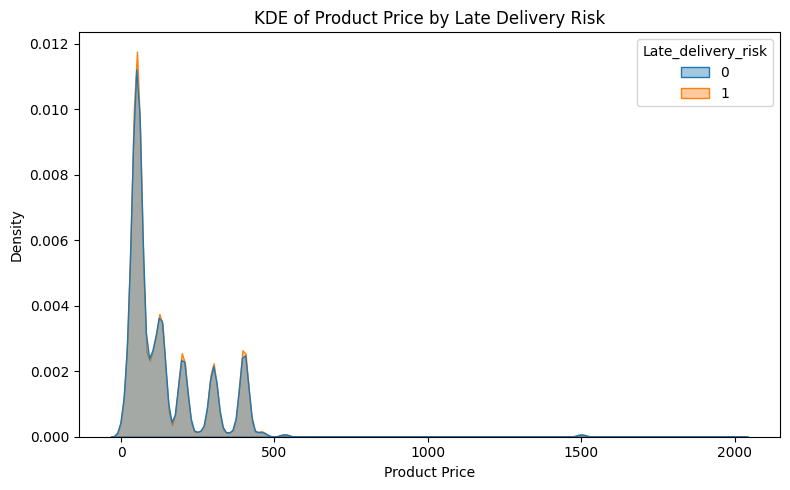

In [195]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=filtered_data_encoded,
    x="Product Price",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

OVER HERE WITH THE HUMAN EYE WE CAN SEE THAT 1 is being classified for all the price cases whichi intorduces biases and may also cause data leakages

THE DATA IS RIGHT SKEWED WHERE IN THE MEAN IS PULLED TO THE RIGHT OF THE MODE BY THE HIGH VALUE OUTLIER

In [ ]:
for i in filtered_data

In [140]:
filtered_data_encoded = filtered_data_encoded.copy()
filtered_data_encoded["ProductPrice_log"] = np.log1p(filtered_data_encoded["Product Price"])


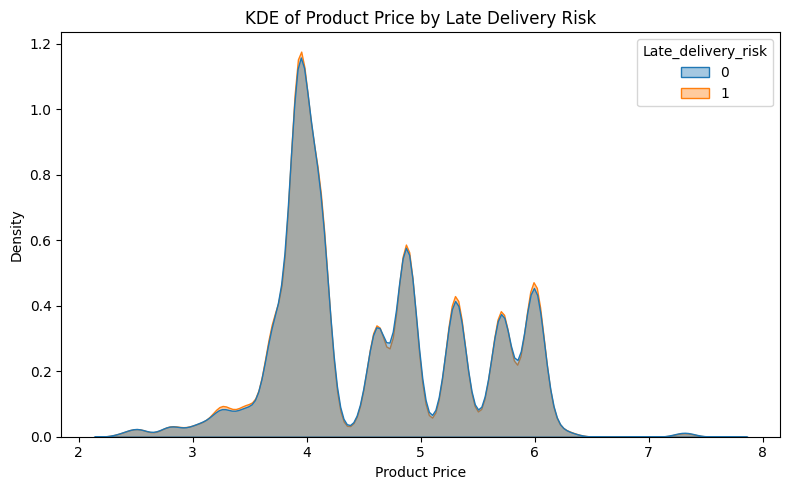

In [141]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=filtered_data_encoded,
    x="ProductPrice_log",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [142]:
for i in filtered_data_encoded.columns:
  print(i,filtered_data_encoded[i].nunique())

Days for shipping (real) 7
Days for shipment (scheduled) 4
Late_delivery_risk 2
Order Item Discount Rate 18
Order Item Quantity 5
Product Price 75
Type_CASH 2
Type_DEBIT 2
Type_PAYMENT 2
Type_TRANSFER 2
Customer Email_XXXXXXXXX 1
Market_Africa 2
Market_Europe 2
Market_LATAM 2
Market_Pacific Asia 2
Market_USCA 2
Order Region_Canada 2
Order Region_Caribbean 2
Order Region_Central Africa 2
Order Region_Central America 2
Order Region_Central Asia 2
Order Region_East Africa 2
Order Region_East of USA 2
Order Region_Eastern Asia 2
Order Region_Eastern Europe 2
Order Region_North Africa 2
Order Region_Northern Europe 2
Order Region_Oceania 2
Order Region_South America 2
Order Region_South Asia 2
Order Region_South of  USA  2
Order Region_Southeast Asia 2
Order Region_Southern Africa 2
Order Region_Southern Europe 2
Order Region_US Center  2
Order Region_West Africa 2
Order Region_West Asia 2
Order Region_West of USA  2
Order Region_Western Europe 2
Order Status_CANCELED 2
Order Status_CLOSED 

In [143]:
filtered_data_encoded.drop('Customer Email_XXXXXXXXX',axis=1,inplace=True)

In [144]:
filtered_data_encoded.head()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Order Item Discount Rate,Order Item Quantity,Product Price,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,...,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,ProductPrice_log
0,3,4,0,0.04,1,327.75,False,True,False,False,...,False,False,False,False,False,False,False,False,True,5.795298
1,5,4,1,0.05,1,327.75,False,False,False,True,...,False,True,False,False,False,False,False,False,True,5.795298
2,4,4,0,0.06,1,327.75,True,False,False,False,...,False,False,False,False,False,False,False,False,True,5.795298
3,3,4,0,0.07,1,327.75,False,True,False,False,...,False,False,False,False,False,False,False,False,True,5.795298
4,2,4,0,0.09,1,327.75,False,False,True,False,...,False,False,True,False,False,False,False,False,True,5.795298


In [145]:
filtered_data_encoded.describe()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Order Item Discount Rate,Order Item Quantity,Product Price,ProductPrice_log
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,0.548291,0.101668,2.127638,141.232550,4.585969
std,1.623722,1.374449,0.497664,0.070415,1.453451,139.732492,0.845781
min,0.000000,0.000000,0.000000,0.000000,1.000000,9.990000,2.396986
25%,2.000000,2.000000,0.000000,0.040000,1.000000,50.000000,3.931826
50%,3.000000,4.000000,1.000000,0.100000,1.000000,59.990002,4.110710
75%,5.000000,4.000000,1.000000,0.160000,3.000000,199.990005,5.303255
max,6.000000,4.000000,1.000000,0.250000,5.000000,1999.989990,7.601397


In [146]:
pd.crosstab(filtered_data_encoded['Late_delivery_risk'],filtered_data_encoded['Order Item Quantity'])

Order Item Quantity,1,2,3,4,5
Late_delivery_risk,,,,,
0,44729,9276,9134,9188,9215
1,54405,11039,11216,11147,11170


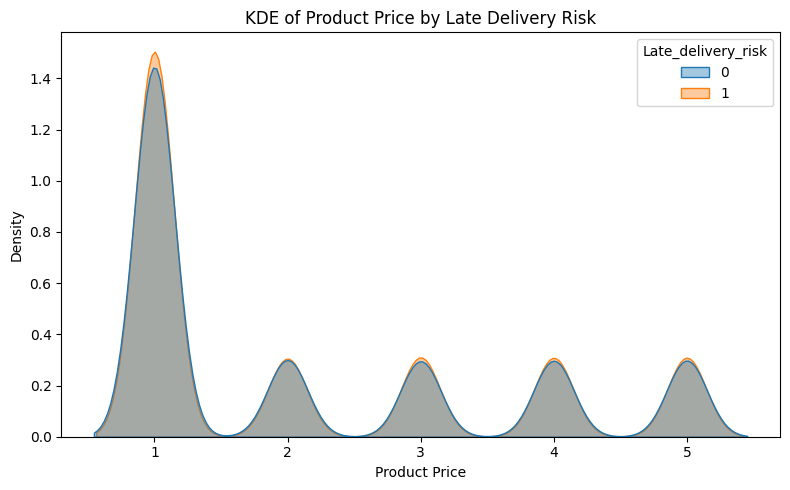

In [147]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=filtered_data_encoded,
    x="Order Item Quantity",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [148]:
filtered_data_encoded = filtered_data_encoded.copy()
filtered_data_encoded["Order_Item_quantity_log"] = np.log1p(filtered_data_encoded["Order Item Quantity"])


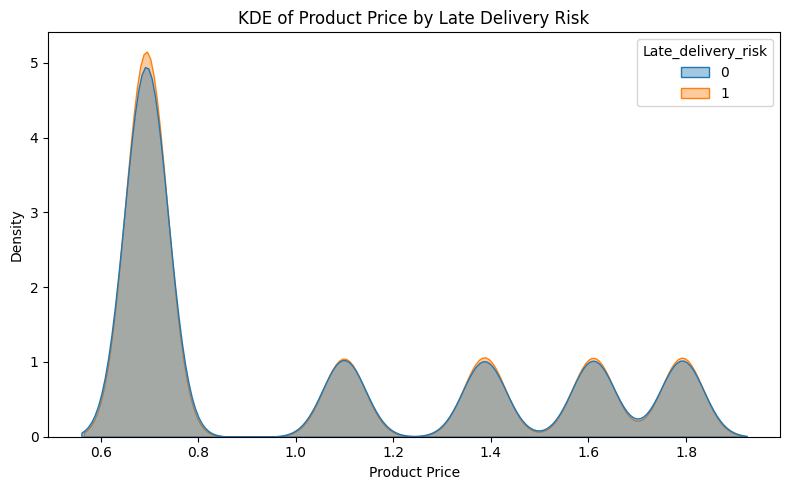

In [149]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=filtered_data_encoded,
    x="Order_Item_quantity_log",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [150]:
pd.crosstab(filtered_data_encoded['Late_delivery_risk'],filtered_data_encoded['Days for shipment (scheduled)'])

Days for shipment (scheduled),0,1,2,4
Late_delivery_risk,,,,
0,5283,1301,8229,66729
1,4454,26513,26987,41023


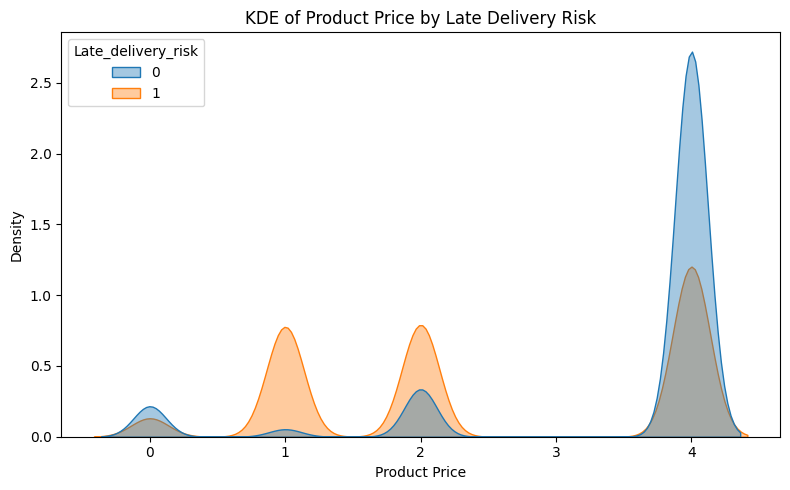

In [151]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=filtered_data_encoded,
    x="Days for shipment (scheduled)",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [152]:
filtered_data_encoded = filtered_data_encoded.copy()
filtered_data_encoded["Days_for_shipment(scheduled)"] = np.log1p(filtered_data_encoded["Days for shipment (scheduled)"])


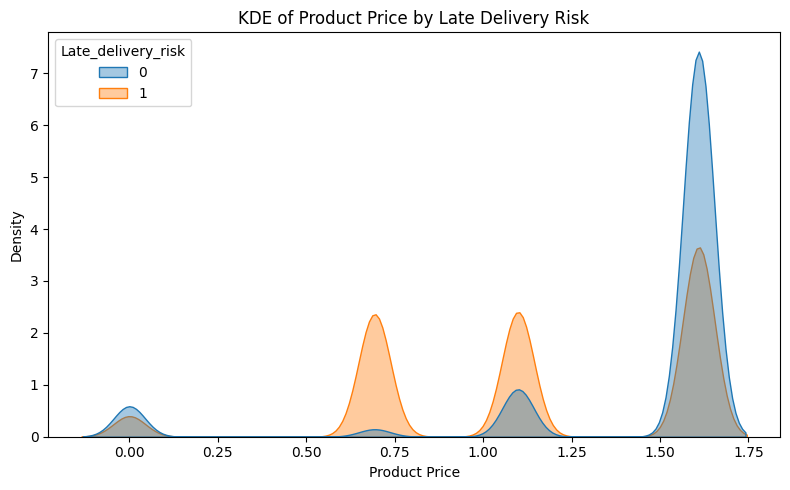

In [153]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=filtered_data_encoded,
    x="Days_for_shipment(scheduled)",
    hue="Late_delivery_risk",   # 0/1 or No/Yes
    fill=True,                  # filled densities
    common_norm=False,          # so each group integrates to 1 separately
    alpha=0.4,
    bw_adjust=1                 # adjust smoothing if needed
)

plt.title("KDE of Product Price by Late Delivery Risk")
plt.xlabel("Product Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [154]:
filtered_data_encoded.describe()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Order Item Discount Rate,Order Item Quantity,Product Price,ProductPrice_log,Order_Item_quantity_log,Days_for_shipment(scheduled)
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,0.548291,0.101668,2.127638,141.232550,4.585969,1.044194,1.281793
std,1.623722,1.374449,0.497664,0.070415,1.453451,139.732492,0.845781,0.424620,0.461124
min,0.000000,0.000000,0.000000,0.000000,1.000000,9.990000,2.396986,0.693147,0.000000
25%,2.000000,2.000000,0.000000,0.040000,1.000000,50.000000,3.931826,0.693147,1.098612
50%,3.000000,4.000000,1.000000,0.100000,1.000000,59.990002,4.110710,0.693147,1.609438
75%,5.000000,4.000000,1.000000,0.160000,3.000000,199.990005,5.303255,1.386294,1.609438
max,6.000000,4.000000,1.000000,0.250000,5.000000,1999.989990,7.601397,1.791759,1.609438


In [155]:
for i in filtered_data_encoded.columns:
  print(i,filtered_data_encoded[i].nunique())

Days for shipping (real) 7
Days for shipment (scheduled) 4
Late_delivery_risk 2
Order Item Discount Rate 18
Order Item Quantity 5
Product Price 75
Type_CASH 2
Type_DEBIT 2
Type_PAYMENT 2
Type_TRANSFER 2
Market_Africa 2
Market_Europe 2
Market_LATAM 2
Market_Pacific Asia 2
Market_USCA 2
Order Region_Canada 2
Order Region_Caribbean 2
Order Region_Central Africa 2
Order Region_Central America 2
Order Region_Central Asia 2
Order Region_East Africa 2
Order Region_East of USA 2
Order Region_Eastern Asia 2
Order Region_Eastern Europe 2
Order Region_North Africa 2
Order Region_Northern Europe 2
Order Region_Oceania 2
Order Region_South America 2
Order Region_South Asia 2
Order Region_South of  USA  2
Order Region_Southeast Asia 2
Order Region_Southern Africa 2
Order Region_Southern Europe 2
Order Region_US Center  2
Order Region_West Africa 2
Order Region_West Asia 2
Order Region_West of USA  2
Order Region_Western Europe 2
Order Status_CANCELED 2
Order Status_CLOSED 2
Order Status_COMPLETE 2
O

In [156]:
train_col = [
    'Days for shipping (real)',
    'Late_delivery_risk',
    'Order Item Discount Rate',
    'Type_CASH',
    'Type_DEBIT',
    'Type_PAYMENT',
    'Type_TRANSFER',
    'Market_Africa',
    'Market_Europe',
    'Market_LATAM',
    'Market_Pacific Asia',
    'Market_USCA',
    'Order Region_Canada',
    'Order Region_Caribbean',
    'Order Region_Central Africa',
    'Order Region_Central America',
    'Order Region_Central Asia',
    'Order Region_East Africa',
    'Order Region_East of USA',
    'Order Region_Eastern Asia',
    'Order Region_Eastern Europe',
    'Order Region_North Africa',
    'Order Region_Northern Europe',
    'Order Region_Oceania',
    'Order Region_South America',
    'Order Region_South Asia',
    'Order Region_South of  USA ',  # Corrected to include trailing space
    'Order Region_Southeast Asia',
    'Order Region_Southern Africa',
    'Order Region_Southern Europe',
    'Order Region_US Center ',
    'Order Region_West Africa',
    'Order Region_West Asia',
    'Order Region_West of USA ',   # Corrected to include trailing space
    'Order Region_Western Europe',
    'Order Status_CANCELED',
    'Order Status_CLOSED',
    'Order Status_COMPLETE',
    'Order Status_ON_HOLD',
    'Order Status_PAYMENT_REVIEW',
    'Order Status_PENDING',
    'Order Status_PENDING_PAYMENT',
    'Order Status_PROCESSING',
    'Order Status_SUSPECTED_FRAUD',
    'Shipping Mode_First Class',
    'Shipping Mode_Same Day',
    'Shipping Mode_Second Class',
    'Shipping Mode_Standard Class',
    'ProductPrice_log',
    'Order_Item_quantity_log',
    'Days_for_shipment(scheduled)',
]
X = filtered_data_encoded[train_col]
y = filtered_data_encoded['Late_delivery_risk']

In [157]:
X.describe()

,Days for shipping (real),Late_delivery_risk,Order Item Discount Rate,ProductPrice_log,Order_Item_quantity_log,Days_for_shipment(scheduled)
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,0.548291,0.101668,4.585969,1.044194,1.281793
std,1.623722,0.497664,0.070415,0.845781,0.424620,0.461124
min,0.000000,0.000000,0.000000,2.396986,0.693147,0.000000
25%,2.000000,0.000000,0.040000,3.931826,0.693147,1.098612
50%,3.000000,1.000000,0.100000,4.110710,0.693147,1.609438
75%,5.000000,1.000000,0.160000,5.303255,1.386294,1.609438
max,6.000000,1.000000,0.250000,7.601397,1.791759,1.609438


In [158]:
X = filtered_data_encoded.drop('Late_delivery_risk', axis=1)
y = filtered_data_encoded['Late_delivery_risk']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [161]:
y_pred_train = model_lr.predict(X_train)
accuracy = accuracy_score(y_test, y_pred_lr)
accuracy_train = accuracy_score(y_train,y_pred_train)
print(f"Accuracy test: {accuracy}")
print(f"Accuracy Train:{accuracy_train}")


Accuracy test: 0.9981165521825837
Accuracy Train:0.9984350656095281


In [162]:
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16307
           1       1.00      1.00      1.00     19797

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



In [163]:
conf_mat = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[16239    68]
 [    0 19797]]


In [47]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_lr, X_train_imputed, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.54831562 0.54824637 0.54807326 0.548281   0.55343974]


In [53]:
# The error `ValueError: Length of values (140) does not match length of index (141)`
# indicates that the number of coefficients in model_lr.coef_[0] (140) does not match
# the number of columns in X_train.columns (141).
# This often happens when the Logistic Regression model implicitly drops a constant feature.
# From earlier analysis, 'Product Status' is a constant column (all zeros).
# We need to remove this column from the index used to create the Series to align the lengths.

corrected_index = X_train.columns

# Check for 'Product Status' and remove it if it causes the length mismatch
if 'Product Status' in X_train.columns and len(X_train.columns.drop('Product Status')) == len(model_lr.coef_[0]):
    corrected_index = X_train.columns.drop('Product Status')
elif 'Product Description' in X_train.columns and len(X_train.columns.drop('Product Description')) == len(model_lr.coef_[0]):
    # In case 'Product Description' (after imputation becoming constant) was the one dropped.
    corrected_index = X_train.columns.drop('Product Description')

# If after attempting to remove known constant columns the length still doesn't match,
# print a warning and proceed with the mismatched index (which will raise the original error)
# or handle it gracefully.
if len(corrected_index) == len(model_lr.coef_[0]):
    feature_importances = pd.Series(model_lr.coef_[0], index=corrected_index)
    print(feature_importances.sort_values(ascending=False))
else:
    print("Error: Could not align feature importances with X_train.columns. Length mismatch remains.")
    print(f"Length of coefficients: {len(model_lr.coef_[0])}")
    print(f"Length of X_train.columns: {len(X_train.columns)}")
    # Re-raise the original error or handle it as appropriate if the lengths still don't match
    raise ValueError("Length of values does not match length of index after attempted correction.")


Days for shipping (real)            0.000627
Delivery Status_Late delivery       0.000472
Sales                               0.000143
Shipping Mode_First Class           0.000120
Order Item Total                    0.000092
                                      ...   
Delivery Status_Shipping on time   -0.000185
Shipping Mode_Standard Class       -0.000189
Longitude                          -0.000207
Delivery Status_Advance shipping   -0.000239
Days for shipment (scheduled)      -0.000472
Length: 140, dtype: float64


In [54]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_imputed, y_train)
y_pred_rf = model_rf.predict(X_test_imputed)


In [55]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [56]:
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16307
           1       1.00      1.00      1.00     19797

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



In [57]:
conf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf)

Confusion Matrix:
 [[16307     0]
 [    0 19797]]
